<a href="https://colab.research.google.com/github/dwchangdev/ds-project/blob/main/AI_02_%EC%9E%A5%EB%8F%99%EC%9A%B1_Section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1&nbsp;&nbsp;[Introduction](#1)**  
&nbsp;&nbsp;&nbsp;&nbsp;1.1&nbsp;&nbsp;[Background](#1.1)  
&nbsp;&nbsp;&nbsp;&nbsp;1.2&nbsp;&nbsp;[Problem definition](#1.2)  
&nbsp;&nbsp;&nbsp;&nbsp;1.3&nbsp;&nbsp;[Data Preparation](#1.3)  
**2&nbsp;&nbsp;[Environment](#2)**  
&nbsp;&nbsp;&nbsp;&nbsp;2.1&nbsp;&nbsp;[Libraries](#2.1)  
&nbsp;&nbsp;&nbsp;&nbsp;2.2&nbsp;&nbsp;[Dataset](#2.2)    
&nbsp;&nbsp;&nbsp;&nbsp;2.3&nbsp;&nbsp;[Data Overview](#2.3)  
&nbsp;&nbsp;&nbsp;&nbsp;2.4&nbsp;&nbsp;[Functions](#2.4)  
**3&nbsp;&nbsp;[Wrangling](#3)**  
&nbsp;&nbsp;&nbsp;&nbsp;3.1&nbsp;&nbsp;[Relevant features](#3.1)  
&nbsp;&nbsp;&nbsp;&nbsp;3.2&nbsp;&nbsp;[Feature datatypes](#3.2)  
&nbsp;&nbsp;&nbsp;&nbsp;3.3&nbsp;&nbsp;[Data export](#3.3)  
**4&nbsp;&nbsp;[Exploration - Exploratory Data Analysis(EDA)](#4)**  
&nbsp;&nbsp;&nbsp;&nbsp;4.1&nbsp;&nbsp;[Data Information](#4.1)  
&nbsp;&nbsp;&nbsp;&nbsp;4.2&nbsp;&nbsp;[Univariate analysis](#4.2)  
&nbsp;&nbsp;&nbsp;&nbsp;4.3&nbsp;&nbsp;[Bivariate analysis](#4.3)  
**5&nbsp;&nbsp;[Engineering](#5)**  
&nbsp;&nbsp;&nbsp;&nbsp;5.1&nbsp;&nbsp;[Sample analysis](#5.1)  
&nbsp;&nbsp;&nbsp;&nbsp;5.2&nbsp;&nbsp;[Feature representation](#5.2)  
&nbsp;&nbsp;&nbsp;&nbsp;5.3&nbsp;&nbsp;[Feature interactions](#5.3)  
&nbsp;&nbsp;&nbsp;&nbsp;5.4&nbsp;&nbsp;[Feature transformations](#5.4)  
&nbsp;&nbsp;&nbsp;&nbsp;5.5&nbsp;&nbsp;[Feature selection](#5.5)  
&nbsp;&nbsp;&nbsp;&nbsp;5.6&nbsp;&nbsp;[Data export](#5.6)  
**6&nbsp;&nbsp;[Modelling](#6)**  
&nbsp;&nbsp;&nbsp;&nbsp;6.1&nbsp;&nbsp;[Baseline models](#6.1)  
&nbsp;&nbsp;&nbsp;&nbsp;6.2&nbsp;&nbsp;[Ensemble models](#6.2)  
**7&nbsp;&nbsp;[Evaluation](#7)**  
&nbsp;&nbsp;&nbsp;&nbsp;7.1&nbsp;&nbsp;[Classifier performance](#7.1)  
&nbsp;&nbsp;&nbsp;&nbsp;7.2&nbsp;&nbsp;[Feature importance](#7.2)  
&nbsp;&nbsp;&nbsp;&nbsp;7.3&nbsp;&nbsp;[Learning rate](#7.3)  
**8&nbsp;&nbsp;[Conclusion](#8)**

## 1 Introduction<a id="1"></a>

### 1.1 Background<a id="1.1"></a>

- 현대 사회 속 데이트 상대 찾기의 어려움
- 소셜 미디어와 위치 기반 데이팅 및 매칭 관련 서비스 수요 급증
- 인간 행동에 대한 이해 선행의 필요성

### 1.2 Problem definition<a id="1.2"></a>

- **dating preferences**, **attribute ratings** 그리고 **background information**을 토대로 파트너가 상대방과 매칭이 될지 예측
- 상대방이 데이트를 수락할지 거절할지 예측하는데 있어서 binary classification으로 진행

### 1.3 Dataset<a id="1.3"></a>

- A study conducted by Columbia University explored gender differences in dating preferences.
- Participants attended a dating event where they had a 4-minute date with every other participant of the opposite sex who attended the same event.
- The participants decided to accept or reject their partner. If both the participant and partner matched, they received each other's contact information.
- Participants rated their partners on six personal attributes: attractiveness, sincerity, intelligence, fun, ambition and shared interests.
- Before and after the event, participants rated their preferences in the six attributes and gave themselves ratings.
- Other information was collected about the participants' background and preferences.

## 2 Environment<a id="2"></a>

### 2.1 Libraries<a id="2.1"></a>

Load libraries into notebook

In [1]:
import numpy as np              # arrays
import pandas as pd             # dataframes
import matplotlib.pyplot as plt # graphs
import seaborn as sns           # visualisations
from scipy import stats         # statistic

In [2]:
from sklearn.experimental import enable_iterative_imputer # enable experimental imputer
from sklearn.impute import IterativeImputer               # sample imputation
from sklearn import preprocessing                         # encoders, transformations
from sklearn.model_selection import cross_validate        # cross-validation, model evaluation
from sklearn.model_selection import GridSearchCV          # hyper-parameter tuning
from sklearn.linear_model import LogisticRegression       # logistic regression model
from sklearn.svm import SVC                               # support vector machine mode
from sklearn.neighbors import KNeighborsClassifier        # k-nearest neighbours mode
from sklearn.ensemble import GradientBoostingClassifier   # gradient boosting mode
from sklearn.ensemble import VotingClassifier             # voting ensemble mode
from sklearn.ensemble import StackingClassifier           # stacking ensemble mode

In [3]:
%matplotlib inline

### 2.2 Dataset<a id="2.2"></a>

Import raw dataset into a dataframe

In [4]:
data_raw = pd.read_csv(
    filepath_or_buffer='/content/Speed Dating Data.csv',
    engine='python'
)

Get number of rows and columns of new dataframe

In [5]:
data_raw.shape

(8378, 195)

### 2.3 Data Overview<a id="2.2"></a>

Check age distribution, proportion of acceptance and reject by sex and race and probability of match

Text(0, 0.5, 'Frequency')

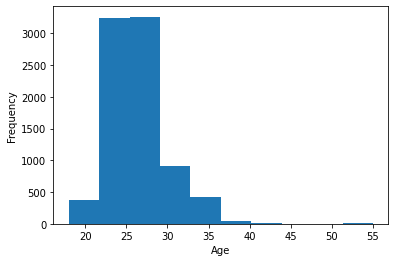

In [6]:
age = data_raw[np.isfinite(data_raw['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

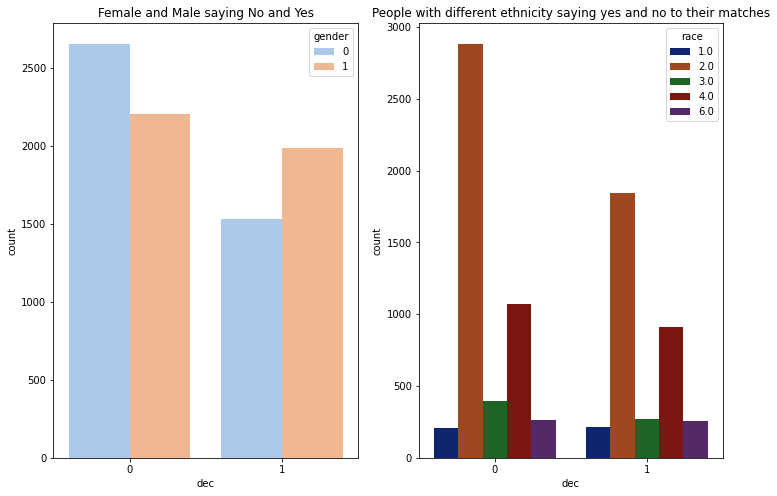

In [7]:
# race_replacement={1:"Black/African American",
#                  2: "European/Caucasion-American",
#                  3: "Latino/Hispanic American",
#                  4: "Asian/Pacific Islander/Asian-American",
#                  5: "Native American",
#                  6: "Other"}
# gender_replacement={0:"Female",
#                     1:"Male"}

# temp_data = data_raw["race"].replace(race_replacement, inplace=True)
# temp_data = data_raw["gender"].replace(gender_replacement, inplace=True)
# temp_data = data_raw
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[12,8])
a_d_s = sns.set_palette("pastel")
a_d_s = sns.countplot(data=data_raw, hue ="gender", x="dec", ax=ax1).set_title("Female and Male saying No and Yes")
a_d_r = sns.set_palette("dark")
a_d_r = sns.countplot(data=data_raw, hue ="race", x="dec", ax=ax2).set_title("People with different ethnicity saying yes and no to their matches")

매칭 확률 확인

In [8]:
pd.crosstab(index=data_raw['match'],columns="count")

col_0,count
match,
0,6998
1,1380


### 2.3 Functions<a id="2.3"></a>

Define a function to plot distribution functions

In [9]:
def plot_distribution(data, bins, title, xlabel, ylabel):
    ax = sns.distplot(
        data,
        bins=bins,
        hist_kws={
            "linewidth": 1,
            'edgecolor': 'black',
            'alpha': 1.0
            },
        kde=False
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel);

Define a function to plot relationship between two features

In [10]:
def plot_relationship(x, y, title, xlabel, ylabel):
    ax = sns.barplot(
        x=x,
        y=y,
        orient='h'
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel);

Define a function to print a feature's mean, standard deviation, skewness and kurtosis

In [12]:
def print_moments(title, feature):
    print(title)
    print('Mean: '+'{:>18.2f}'.format(feature.mean()))
    print('Standard deviation: '+'{:.2f}'.format(feature.std()))
    print('Skewness: '+'{:>14.2f}'.format(feature.skew()))
    print('Kurtosis: '+'{:>14.2f}'.format(feature.kurtosis()))

## 3 Wrangling<a id="3"></a>

### 3.1 Relevant features<a id="3.1"></a>

Identify relevant features and associated datatypes

In [13]:
relevant_features = [
    ['iid', 'int16'],
    ['gender', 'bool'],
    ['wave', 'int16'],
    ['position', 'int16'],
    ['order', 'int16'],
    ['pid', 'int16'],
    ['age_o', 'int16'],
    ['race_o', 'category'],
    ['pf_o_att', 'int16'],
    ['pf_o_sin', 'int16'],
    ['pf_o_int', 'int16'],
    ['pf_o_fun', 'int16'],
    ['pf_o_amb', 'int16'],
    ['pf_o_sha', 'int16'],
    ['dec_o', 'bool'],
    ['attr_o', 'int16'],
    ['sinc_o', 'int16'],
    ['intel_o', 'int16'],
    ['fun_o', 'int16'],
    ['amb_o', 'int16'],
    ['shar_o', 'int16'],
    ['like_o', 'int16'],
    ['prob_o', 'int16'],
    ['met_o', 'bool'],
    ['age', 'int16'],
    ['field_cd', 'category'],
    ['race', 'category'],
    ['imprace', 'int16'],
    ['imprelig', 'int16'],
    ['goal', 'category'],
    ['date', 'int16'],
    ['go_out', 'int16'],
    ['career_c', 'category'],
    ['sports', 'int16'],
    ['tvsports', 'int16'],
    ['exercise', 'int16'],
    ['dining', 'int16'],
    ['museums', 'int16'],
    ['art', 'int16'],
    ['hiking', 'int16'],
    ['gaming', 'int16'],
    ['clubbing', 'int16'],
    ['reading', 'int16'],
    ['tv', 'int16'],
    ['theater', 'int16'],
    ['movies', 'int16'],
    ['concerts', 'int16'],
    ['music', 'int16'],
    ['shopping', 'int16'],
    ['yoga', 'int16'],
    ['exphappy', 'int16'],
    ['expnum', 'int16'],
    ['attr1_1', 'int16'],
    ['sinc1_1', 'int16'],
    ['intel1_1', 'int16'],
    ['fun1_1', 'int16'],
    ['amb1_1', 'int16'],
    ['shar1_1', 'int16'],
    ['attr3_1', 'int16'],
    ['sinc3_1', 'int16'],
    ['fun3_1', 'int16'],
    ['intel3_1', 'int16'],
    ['amb3_1', 'int16'],
    ['dec', 'bool'],
    ['attr', 'int16'],
    ['sinc', 'int16'],
    ['intel', 'int16'],
    ['fun', 'int16'],
    ['amb', 'int16'],
    ['shar', 'int16'],
    ['like', 'int16'],
    ['prob', 'int16'],
    ['met', 'int16'],
    ['match_es', 'int16'],
    ['satis_2', 'int16'],
    ['length', 'int16'],
    ['numdat_2', 'int16']
]

Create new dataframe containing relevant features

In [14]:
data = data_raw[[feature[0] for feature in relevant_features]]

Get number of rows and columns of new dataframe

In [15]:
data.shape

(8378, 77)

### 3.2 Feature datatypes<a id="3.2"></a>

Update feature datatypes

In [16]:
data = data.astype({feature: datatype if all(data[feature].notna().values) else 'float32' if datatype == 'int16' else datatype for (feature, datatype) in relevant_features})

### 3.3 Data export<a id="3.3"></a>

Persist dataframe containing relevant features with appropriate datatypes

In [17]:
data.to_csv(
    path_or_buf='./data.csv',
    index=False
)

## 4 Exploration<a id="4"></a>

### 4.1 Data Information<a id="4.1"></a>

In [18]:
#pd.set_option('dispaly.max_counts', None)
pd.options.display.max_columns = None
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

데이터프레임의 row와 columns의 개수 확인

In [19]:
data.shape

(8378, 77)

데이터 타입 확인

In [20]:
data.dtypes

iid            int16
gender          bool
wave           int16
position       int16
order          int16
pid          float32
age_o        float32
race_o      category
pf_o_att     float32
pf_o_sin     float32
pf_o_int     float32
pf_o_fun     float32
pf_o_amb     float32
pf_o_sha     float32
dec_o           bool
attr_o       float32
sinc_o       float32
intel_o      float32
fun_o        float32
amb_o        float32
shar_o       float32
like_o       float32
prob_o       float32
met_o           bool
age          float32
field_cd    category
race        category
imprace      float32
imprelig     float32
goal        category
date         float32
go_out       float32
career_c    category
sports       float32
tvsports     float32
exercise     float32
dining       float32
museums      float32
art          float32
hiking       float32
gaming       float32
clubbing     float32
reading      float32
tv           float32
theater      float32
movies       float32
concerts     float32
music        

중복값 여부 확인

In [21]:
data.T.duplicated()

iid         False
gender      False
wave        False
position    False
order       False
pid         False
age_o       False
race_o      False
pf_o_att    False
pf_o_sin    False
pf_o_int    False
pf_o_fun    False
pf_o_amb    False
pf_o_sha    False
dec_o       False
attr_o      False
sinc_o      False
intel_o     False
fun_o       False
amb_o       False
shar_o      False
like_o      False
prob_o      False
met_o       False
age         False
field_cd    False
race        False
imprace     False
imprelig    False
goal        False
date        False
go_out      False
career_c    False
sports      False
tvsports    False
exercise    False
dining      False
museums     False
art         False
hiking      False
gaming      False
clubbing    False
reading     False
tv          False
theater     False
movies      False
concerts    False
music       False
shopping    False
yoga        False
exphappy    False
expnum      False
attr1_1     False
sinc1_1     False
intel1_1    False
fun1_1    

결측치 확인

In [22]:
# 전체 데이터 개수 : 8378

data.isnull().sum()

iid            0
gender         0
wave           0
position       0
order          0
pid           10
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o          0
age           95
field_cd      82
race          63
imprace       79
imprelig      79
goal          79
date          97
go_out        79
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
expnum      6578
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr3_1      1

### 4.2 Univariate analysis<a id="4.1"></a>

Get proportion of dates where partner matched with subject

In [23]:
partner_accepts = data['dec_o']
round(partner_accepts[partner_accepts == True].count()/partner_accepts.count(),3)

0.42

Plot the distributions of subject attribute ratings from their partners

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


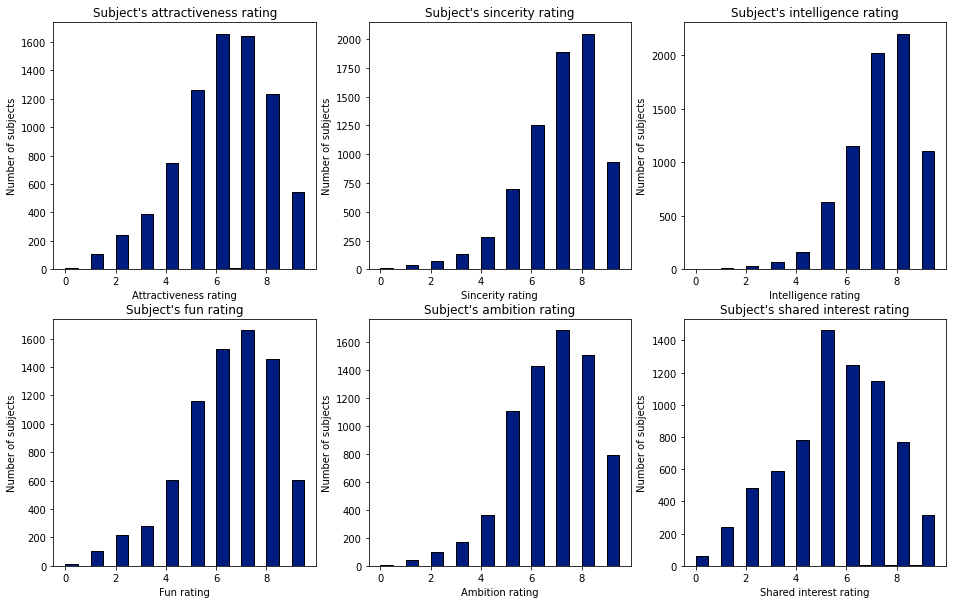

In [24]:
plt.figure(figsize=(16,10))
plt.tight_layout(pad=5.0)

plt.subplot(2,3,1)
plot_distribution(
    data=data['attr_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s attractiveness rating',
    xlabel='Attractiveness rating',
    ylabel='Number of subjects'
)
plt.subplot(2,3,2)
plot_distribution(
    data=data['sinc_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s sincerity rating',
    xlabel='Sincerity rating',
    ylabel='Number of subjects'
)
plt.subplot(2,3,3)
plot_distribution(
    data=data['intel_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s intelligence rating',
    xlabel='Intelligence rating',
    ylabel='Number of subjects'
)
plt.subplot(2,3,4)
plot_distribution(
    data=data['fun_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s fun rating',
    xlabel='Fun rating',
    ylabel='Number of subjects'
)
plt.subplot(2,3,5)
plot_distribution(
    data=data['amb_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s ambition rating',
    xlabel='Ambition rating',
    ylabel='Number of subjects'
)
plt.subplot(2,3,6)
plot_distribution(
    data=data['shar_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s shared interest rating',
    xlabel='Shared interest rating',
    ylabel='Number of subjects'
)

Calculate the moments of subject attribute ratings from their partners

In [25]:
print_moments('Attractiveness rating', data['attr_o'])

Attractiveness rating
Mean:               6.19
Standard deviation: 1.95
Skewness:          -0.32
Kurtosis:          -0.10


In [26]:
print_moments('Sincerity rating', data['sinc_o'])

Sincerity rating
Mean:               7.18
Standard deviation: 1.74
Skewness:          -0.64
Kurtosis:           0.75


In [27]:
print_moments('Intelligence rating', data['intel_o'])

Intelligence rating
Mean:               7.37
Standard deviation: 1.55
Skewness:          -0.55
Kurtosis:           0.76


In [28]:
print_moments('Fun rating', data['fun_o'])

Fun rating
Mean:               6.40
Standard deviation: 1.95
Skewness:          -0.45
Kurtosis:           0.10


In [29]:
print_moments('Ambition rating', data['amb_o'])

Ambition rating
Mean:               6.78
Standard deviation: 1.79
Skewness:          -0.39
Kurtosis:           0.17


In [30]:
print_moments('Shared interest rating', data['shar_o'])

Shared interest rating
Mean:               5.47
Standard deviation: 2.16
Skewness:          -0.19
Kurtosis:          -0.37


Get features with highest variance

In [31]:
data.std().sort_values(ascending=False).head(10)

pid         158.584335
iid         158.583367
attr1_1      12.587790
pf_o_att     12.569827
sinc1_1       7.046759
pf_o_sin      7.044133
intel1_1      6.783009
pf_o_int      6.782840
pf_o_sha      6.362691
shar1_1       6.362234
dtype: float64

Get features with highest skew

In [32]:
abs(data.skew()).sort_values(ascending=False).head(10)

pf_o_att    2.176008
attr1_1     2.173592
match_es    1.522720
expnum      1.394183
go_out      1.204180
movies      1.081646
sinc3_1     1.080209
age_o       1.073471
age         1.069590
fun3_1      0.824947
dtype: float64

### 4.3 Bivariate analysis<a id="4.2"></a>

Visualise correlation between selected features

In [33]:
features_selected = [
    'dec_o',
    'pf_o_att',
    'pf_o_sin',
    'pf_o_int',
    'pf_o_fun',
    'pf_o_amb',
    'pf_o_sha',
    'attr_o',
    'sinc_o',
    'intel_o',
    'fun_o',
    'amb_o',
    'shar_o'
]

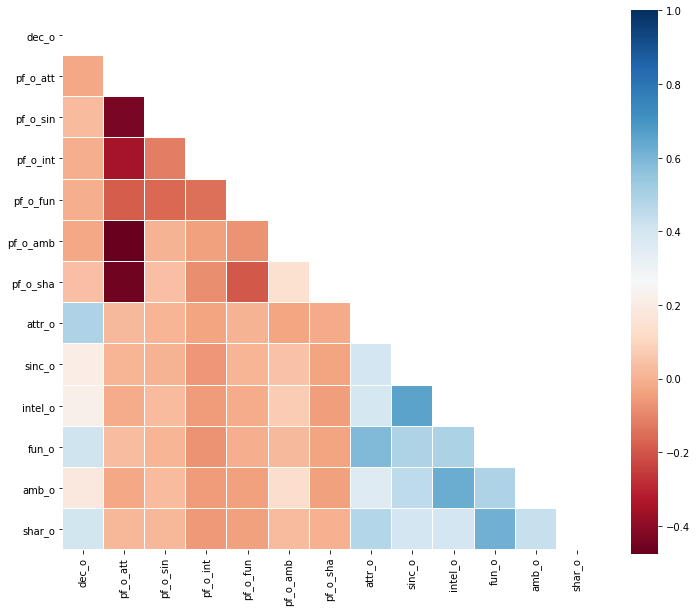

In [34]:
plt.figure(figsize=(12,10))
cmap = plt.cm.RdBu
mask = np.triu(data[features_selected].astype(float).corr())
sns.heatmap(
    data[features_selected].astype(float).corr(),
    square=True,
    cmap=cmap,
    mask=mask,
    linewidths=0.1,
    vmax=1.0,
    linecolor='white'
);

Visualise correlation between selected features for men

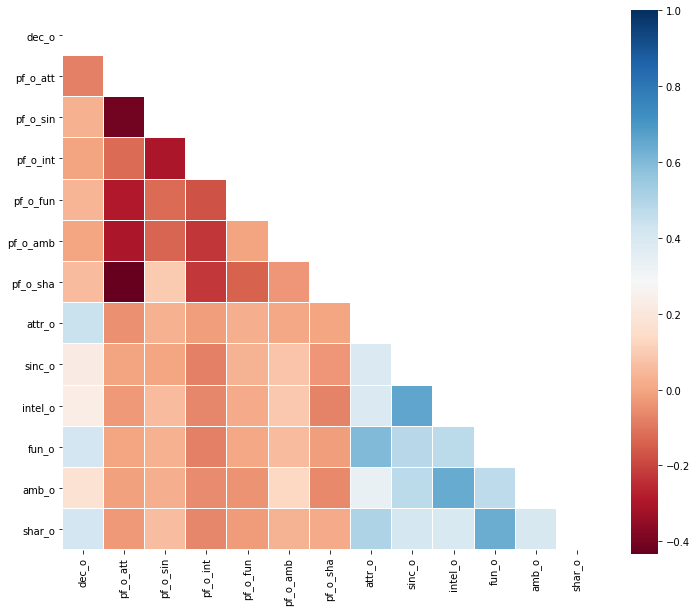

In [35]:
data_men = data[data['gender']==1]

plt.figure(figsize=(12,10))
cmap = plt.cm.RdBu
mask = np.triu(data_men[features_selected].astype(float).corr())
sns.heatmap(
    data_men[features_selected].astype(float).corr(),
    square=True,
    cmap=cmap,
    mask=mask,
    linewidths=0.1,
    vmax=1.0,
    linecolor='white'
);

Visualise correlation between selected features for women

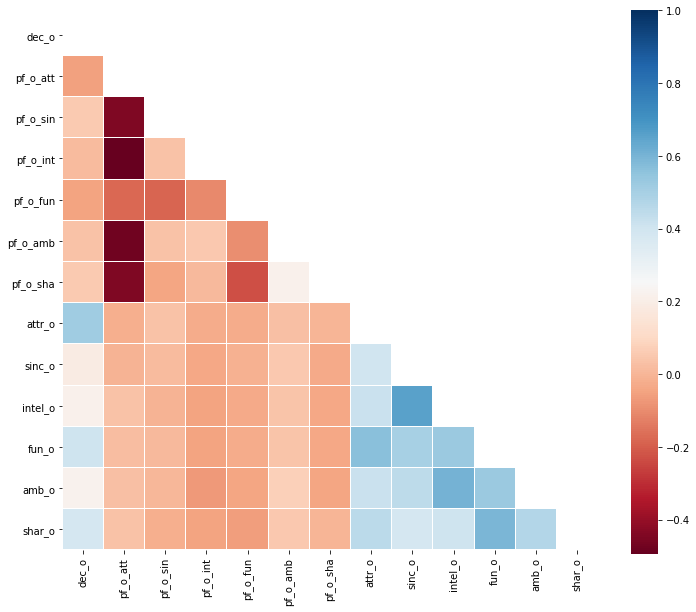

In [36]:
data_women = data[data['gender']==0]

plt.figure(figsize=(12,10))
cmap = plt.cm.RdBu
mask = np.triu(data_women[features_selected].astype(float).corr())
sns.heatmap(
    data_women[features_selected].astype(float).corr(),
    square=True,
    cmap=cmap,
    mask=mask,
    linewidths=0.1,
    vmax=1.0,
    linecolor='white'
);

Get highest correlated feature pairs

In [37]:
correlations = data.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
correlations = correlations[correlations != 1]
correlations[correlations > 0.6]

iid      wave        0.996713
pid      wave        0.996712
iid      pid         0.992968
art      museums     0.858548
fun_o    like_o      0.691267
fun      like        0.691248
attr_o   like_o      0.667240
attr     like        0.667239
shar     like        0.660826
like_o   shar_o      0.660448
sinc     intel       0.657664
intel_o  sinc_o      0.657548
music    concerts    0.655728
amb      intel       0.627483
intel_o  amb_o       0.627332
shar_o   fun_o       0.617995
shar     fun         0.617989
dtype: float64

Get highest correlated features with target variable

In [38]:
partner_decision_correlations = correlations.loc['dec_o']
partner_decision_correlations[partner_decision_correlations > 0.1]

attr_o     0.486885
fun_o      0.414276
intel_o    0.216704
amb_o      0.183216
gender     0.111550
dtype: float64

## 5 Engineering<a id="5"></a>

### 5.1 Sample analysis<a id="5.1"></a>

Get proportion of dataframe with missing samples

In [39]:
def missing_values(df):
    missing=pd.DataFrame(df.isnull().sum()/len(data))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(df.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(data)

,missing_values(%),missing_values(numbers)
expnum,78.515159,6578
match_es,14.000955,1173
shar_o,12.843161,1076
shar,12.735736,1067
numdat_2,11.279542,945
length,10.921461,915
satis_2,10.921461,915
amb_o,8.617809,722
amb,8.498448,712
met,4.476009,375


In [40]:
missing_samples_proportion = data.isnull().sum()/len(data)
missing_samples_proportion.sort_values(ascending=False).head(10)

expnum      0.785152
match_es    0.140010
shar_o      0.128432
shar        0.127357
numdat_2    0.112795
satis_2     0.109215
length      0.109215
amb_o       0.086178
amb         0.084984
met         0.044760
dtype: float64

Drop features with more than 50% missing samples

In [40]:
#missing_half_samples = missing_samples_proportion[missing_samples_proportion > 0.5].index.values
#data.drop(columns=missing_half_samples, inplace=True)

Impute missing samples using iterative imputer

In [41]:
imputer = IterativeImputer(
    missing_values=np.nan,
    sample_posterior=True,
    n_nearest_features=5,
    min_value=0,
    max_value=100,
    random_state=0
)
imputer.fit(data)
data_imputed = np.around(imputer.transform(data))
data = pd.DataFrame(data_imputed, columns=data.columns)

In [42]:
data = data.astype({feature: datatype if all(data[feature].notna().values) else 'float32' if datatype == 'int16' else datatype for (feature, datatype) in relevant_features})

### 5.2 Feature representation<a id="5.2"></a>

Encode nominal features using one-hot encoding

In [49]:
features_nominal = data.dtypes[data.dtypes == 'category'].index.values
data = pd.get_dummies(data, prefix=features_nominal)

### 5.3 Feature interactions<a id="5.3"></a>

Calculate the average attribute ratings for each subject

In [50]:
subject_attractiveness_mean = data[['iid', 'attr_o']].groupby(['iid']).mean()['attr_o']
subject_sincerity_mean = data[['iid', 'sinc_o']].groupby(['iid']).mean()['sinc_o']
subject_intelligence_mean = data[['iid', 'intel_o']].groupby(['iid']).mean()['intel_o']
subject_fun_mean = data[['iid', 'fun_o']].groupby(['iid']).mean()['fun_o']
subject_ambition_mean = data[['iid', 'amb_o']].groupby(['iid']).mean()['amb_o']
subject_shared_interest_mean = data[['iid', 'shar_o']].groupby(['iid']).mean()['shar_o']

Insert average attribute ratings into dataframe

In [51]:
data = data.merge(
    right=subject_attractiveness_mean,
    how='inner',
    on='iid'
).rename(columns={
    'attr_o_x': 'attr_o',
    'attr_o_y': 'subject_attractiveness_mean'
})
data = data.merge(
    right=subject_sincerity_mean,
    how='inner',
    on='iid'
).rename(columns={
    'sinc_o_x': 'sinc_o',
    'sinc_o_y': 'subject_sincerity_mean'
})
data = data.merge(
    right=subject_intelligence_mean,
    how='inner',
    on='iid'
).rename(columns={
    'intel_o_x': 'intel_o',
    'intel_o_y': 'subject_intelligence_mean'
})
data = data.merge(
    right=subject_fun_mean,
    how='inner',
    on='iid'
).rename(columns={
    'fun_o_x': 'fun_o',
    'fun_o_y': 'subject_fun_mean'
})
data = data.merge(
    right=subject_ambition_mean,
    how='inner',
    on='iid'
).rename(columns={
    'amb_o_x': 'amb_o',
    'amb_o_y': 'subject_ambition_mean'
})
data = data.merge(
    right=subject_shared_interest_mean,
    how='inner',
    on='iid'
).rename(columns={
    'shar_o_x': 'shar_o',
    'shar_o_y': 'subject_shared_interest_mean'
})

Calculate difference between subject and partner's ages

In [52]:
data['age_difference'] = abs(data['age'] - data['age_o'])

Calculate difference between subject's attribute ratings and partner's attributes ratings

In [53]:
data['attractiveness_difference'] = abs(data['attr'] - data['attr_o'])
data['sincerity_difference'] = abs(data['sinc'] - data['sinc_o'])
data['intelligence_difference'] = abs(data['intel'] - data['intel_o'])
data['fun_difference'] = abs(data['fun'] - data['fun_o'])
data['ambition_difference'] = abs(data['amb'] - data['amb_o'])
data['shared_interest_difference'] = abs(data['shar'] - data['shar_o'])

### 5.4 Feature transformations<a id="5.4"></a>

Scale normal features to zero mean and unit variance

In [56]:
features_normal = [
    'attr_o',
    'sinc_o',
    'intel_o',
    'fun_o',
    'amb_o',
    'shar_o',
    'age_difference',
    'attractiveness_difference',
    'sincerity_difference',
    'intelligence_difference',
    'fun_difference',
    'ambition_difference',
    'shared_interest_difference'
]

In [57]:
data[features_normal] = data[features_normal].apply(lambda x: preprocessing.scale(x))

### 5.5 Feature selection<a id="5.5"></a>

Drop irrelevant features which contain no information about the target variable 

In [58]:
features_no_information = [
    'iid',
    'pid',
    'wave',
    'position',
    'order'
]

Drop features that are known in the future

In [59]:
features_future_information = [
    'dec',
    'dec_o',
    'like',
    'prob',
    'like_o',
    'prob_o'
]

Drop features that have low variance

In [60]:
feature_variances = data.std().sort_values(ascending=True)
features_low_variance = feature_variances[feature_variances < 0.1].index.values.tolist()

Drop features that have weak correlation with target variable

In [61]:
features_weak_correlation = partner_decision_correlations[partner_decision_correlations < 0.1].axes[0].to_list()
features_weak_correlation = list(set(features_weak_correlation) - set(features_future_information) - set(features_no_information))

Drop features that were used in interaction variables

In [62]:
features_interaction = [
    'age',
    'age_o',
]

In [63]:
features_remove = features_no_information+features_future_information+features_low_variance+features_weak_correlation+features_interaction
data_model = data.drop(columns=features_remove)

Get memory usage of model dataframe

In [64]:
data_model.memory_usage().sum()

2538534

### 5.6 Data export<a id="5.6"></a>

Persist dataframe containing features to be used in model

In [65]:
data_model.to_csv(
    path_or_buf='./data_model.csv',
    index=False
)

## 6 Modelling<a id="6"></a>

### 6.1 Baseline models<a id="6.1"></a>

Define feature and target variables

In [66]:
features = data_model
target = data['dec_o']

Instantiate, train and tune a linear model

In [67]:
parameters = {
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'C': np.logspace(-4, 4, 20),
    'max_iter': [10000]
}
classifier_lr = LogisticRegression(random_state=0)
classifier_lr = GridSearchCV(
    estimator=classifier_lr,
    param_grid=parameters,
    cv=5,
    verbose=2,
    n_jobs=-1
)
classifier_lr.fit(features, target)
classifier_lr.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.7min finished


{'C': 0.615848211066026, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}

In [68]:
classifier_lr = LogisticRegression(
    random_state=0,
    penalty=classifier_lr.best_params_['penalty'],
    solver=classifier_lr.best_params_['solver'],
    C=classifier_lr.best_params_['C'],
    max_iter=classifier_lr.best_params_['max_iter']
)

Instantiate, train and tune a discriminative model

In [69]:
parameters = {
    'kernel': ['rbf'],
    'gamma': [1e-4, 1e-3, 1e-2],
    'C': [1, 10, 100, 1000]
}
classifier_sv = SVC(random_state=0)
classifier_sv = GridSearchCV(
    estimator=classifier_sv,
    param_grid=parameters,
    cv=5,
    verbose=2,
    n_jobs=-1
)
classifier_sv.fit(features, target)
classifier_sv.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.8min finished


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [70]:
classifier_sv = SVC(
    random_state=0,
    kernel=classifier_sv.best_params_['kernel'],
    gamma=classifier_sv.best_params_['gamma'],
    C=classifier_sv.best_params_['C']
)

Instantiate, train and tune a instance-based model

In [71]:
parameters = {
    'n_neighbors': [5,11,19,29],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}
classifier_kn = KNeighborsClassifier()
classifier_kn = GridSearchCV(
    estimator=classifier_kn,
    param_grid=parameters,
    cv=5,
    verbose=2,
    n_jobs=-1
)
classifier_kn.fit(features, target)
classifier_kn.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.6min finished


{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}

In [72]:
classifier_kn = KNeighborsClassifier(
    n_neighbors=classifier_kn.best_params_['n_neighbors'],
    weights=classifier_kn.best_params_['weights'],
    metric=classifier_kn.best_params_['metric']
)

### 6.2 Ensemble models<a id="6.2"></a>

Instantiate, train and tune a boosting model

In [73]:
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.05],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'max_features': ['sqrt', 'log2']
}
classifier_gb = GradientBoostingClassifier(random_state=0)
classifier_gb = GridSearchCV(
    estimator=classifier_gb,
    param_grid=parameters,
    cv=5,
    verbose=2,
    n_jobs=-1
)
classifier_gb.fit(features, target)
classifier_gb.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.1min finished


{'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [74]:
classifier_gb = GradientBoostingClassifier(
    random_state=0,
    loss=classifier_gb.best_params_['loss'],
    learning_rate=classifier_gb.best_params_['learning_rate'],
    n_estimators=classifier_gb.best_params_['n_estimators'],
    max_depth=classifier_gb.best_params_['max_depth'],
    max_features=classifier_gb.best_params_['max_features']
)

Instantiate and train a voting and stacking model

In [75]:
estimators = [
    ('lr', classifier_lr),
    ('sv', classifier_sv),
    ('kn', classifier_kn),
    ('gb', classifier_gb)
]

In [76]:
classifier_ve = VotingClassifier(
    estimators=estimators,
    voting='hard'
)

In [77]:
classifier_se = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

## 7 Evaluation<a id="7"></a>

### 7.1 Classifier performance<a id="7.1"></a>

Calculate performance metrics for each model

In [ ]:
metrics = ['accuracy', 'precision', 'recall', 'f1_macro']

for classifier, label in zip(
    [classifier_lr, classifier_sv, classifier_kn, classifier_gb, classifier_ve, classifier_se],
    ['Logistic Regression', 'Support Vector Machine', 'k-Nearest Neighbours', 'Gradient Boosting', 'Voting Ensemble', 'Stacking Ensemble']
):
    print('{}'.format(label))
    scores = cross_validate(
        estimator=classifier,
        X=features,
        y=target,
        scoring=metrics,
        cv=5,
        n_jobs=-1
    )
    for key, value in scores.items():
        print('{:14} {:.3f} +/- {:.3f}'.format(key, value.mean(), value.std()))
    print('\n')

Logistic Regression
fit_time       0.445 +/- 0.064
score_time     0.013 +/- 0.004
test_accuracy  0.757 +/- 0.006
test_precision 0.715 +/- 0.019
test_recall    0.722 +/- 0.035
test_f1_macro  0.752 +/- 0.006


Support Vector Machine
fit_time       1.155 +/- 0.068
score_time     0.243 +/- 0.019
test_accuracy  0.753 +/- 0.006
test_precision 0.714 +/- 0.017
test_recall    0.707 +/- 0.038
test_f1_macro  0.747 +/- 0.007


k-Nearest Neighbours
fit_time       0.051 +/- 0.007
score_time     0.559 +/- 0.081
test_accuracy  0.668 +/- 0.036
test_precision 0.636 +/- 0.049
test_recall    0.517 +/- 0.070
test_f1_macro  0.649 +/- 0.041


Gradient Boosting
fit_time       1.357 +/- 0.209
score_time     0.018 +/- 0.004
test_accuracy  0.754 +/- 0.014
test_precision 0.715 +/- 0.035
test_recall    0.713 +/- 0.030
test_f1_macro  0.749 +/- 0.012


Voting Ensemble
fit_time       2.959 +/- 0.351
score_time     0.808 +/- 0.096
test_accuracy  0.760 +/- 0.007
test_precision 0.744 +/- 0.026
test_recall    0.671 +/- 0

### 7.2 Feature importance<a id="7.2"></a>

Get coefficients of features in linear model

In [ ]:
labels = features.columns.values
weights = classifier_lr.fit(features,target).coef_[0]

Get features with highest magnitude

In [ ]:
top_features = sorted(list(zip(labels,weights)), reverse=True, key = lambda x: abs(x[1]))[0:10]
top_labels = [x[0] for x in top_features]
top_weights = [x[1] for x in top_features]

Plot features with highest magnitude

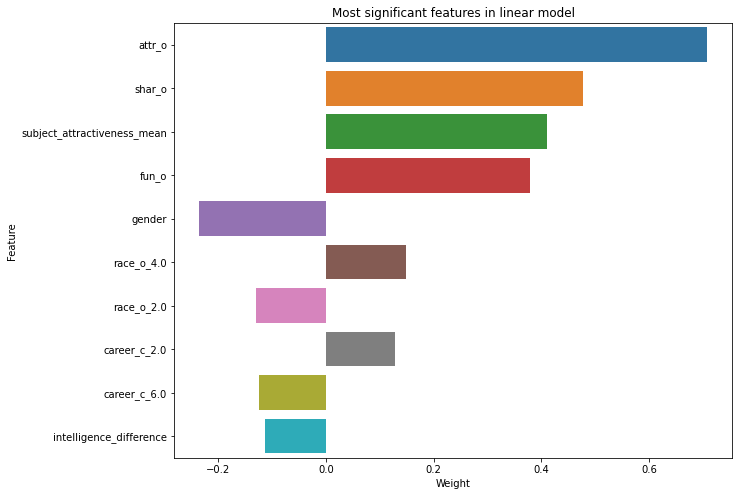

In [ ]:
plt.figure(figsize=(10,8))
plot_relationship(top_weights, top_labels, 'Most significant features in linear model', 'Weight', 'Feature')

## 8 Conclusion<a id="8"></a>

- This notebook explored whether a machine learning model could predict if a partner will match with their date.
- The best performing classifier was a stacking ensemble model with an accuracy of **~76%** and an F1 score of **~75%**.
- Based on correlation analysis and weights in the linear model:
  - **Attractiveness**, **shared interests** and being **fun** were the most significant factors in a partner's decision.
  - **Medical students** had the highest probability of being matched while **psychologists** and **academics** had the lowest.
- Further feature engineering such as introducing more interaction features and performing more thorough feature selection could improve the classifier performance.